In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode


In [6]:
df=pd.read_csv("Dataset/diamonds.csv")

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
df.shape

(53940, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
# make a split of numerical and categorical columns
numerical = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical = df.loc[:, ~df.columns.isin(numerical)].columns

In [14]:
numerical

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [15]:
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

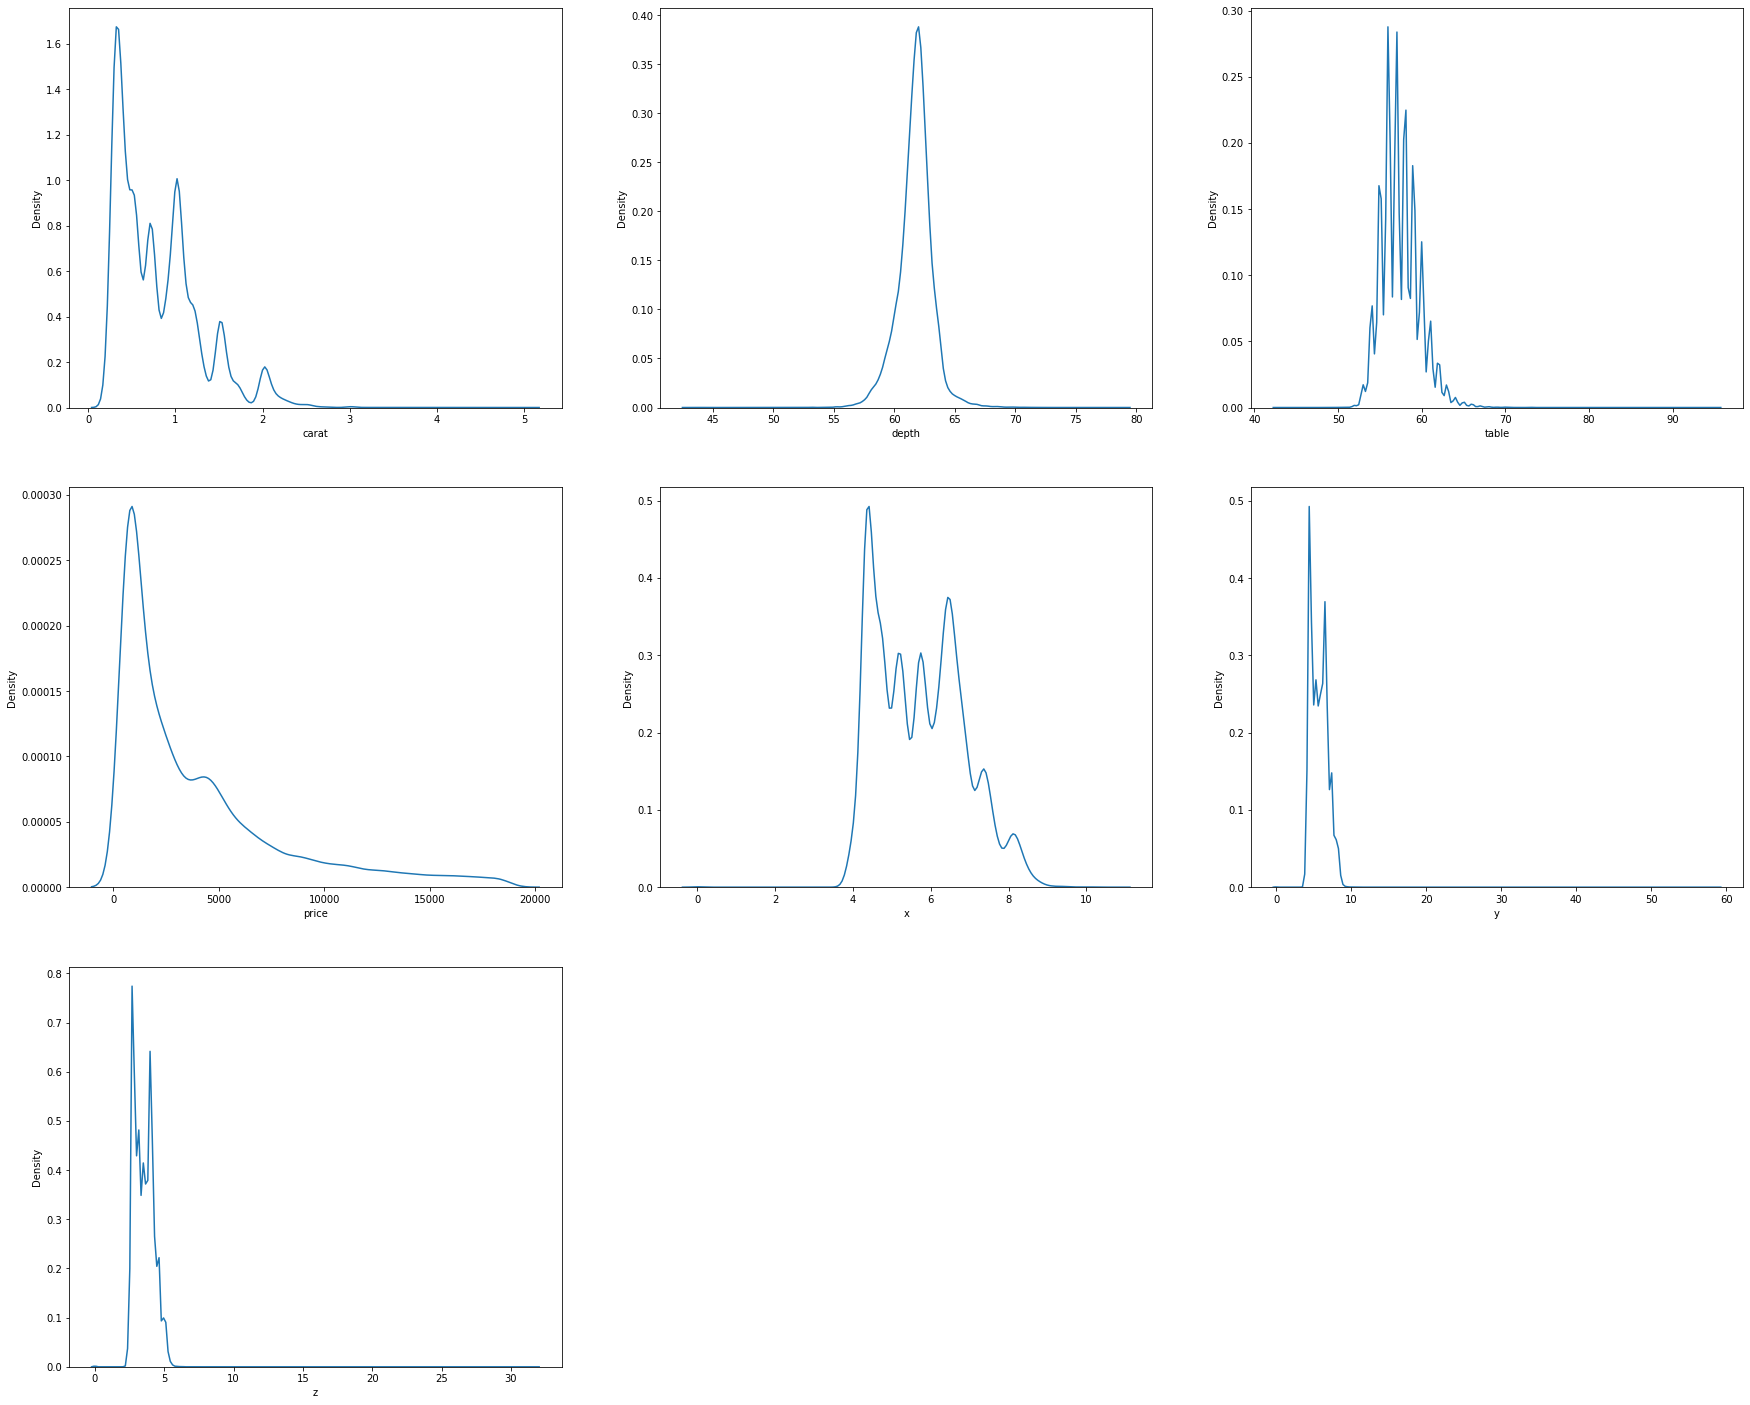

In [16]:
# plot the distplot for numerical columns
plt.figure(figsize = (30, 25))

for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[col], hist = False)

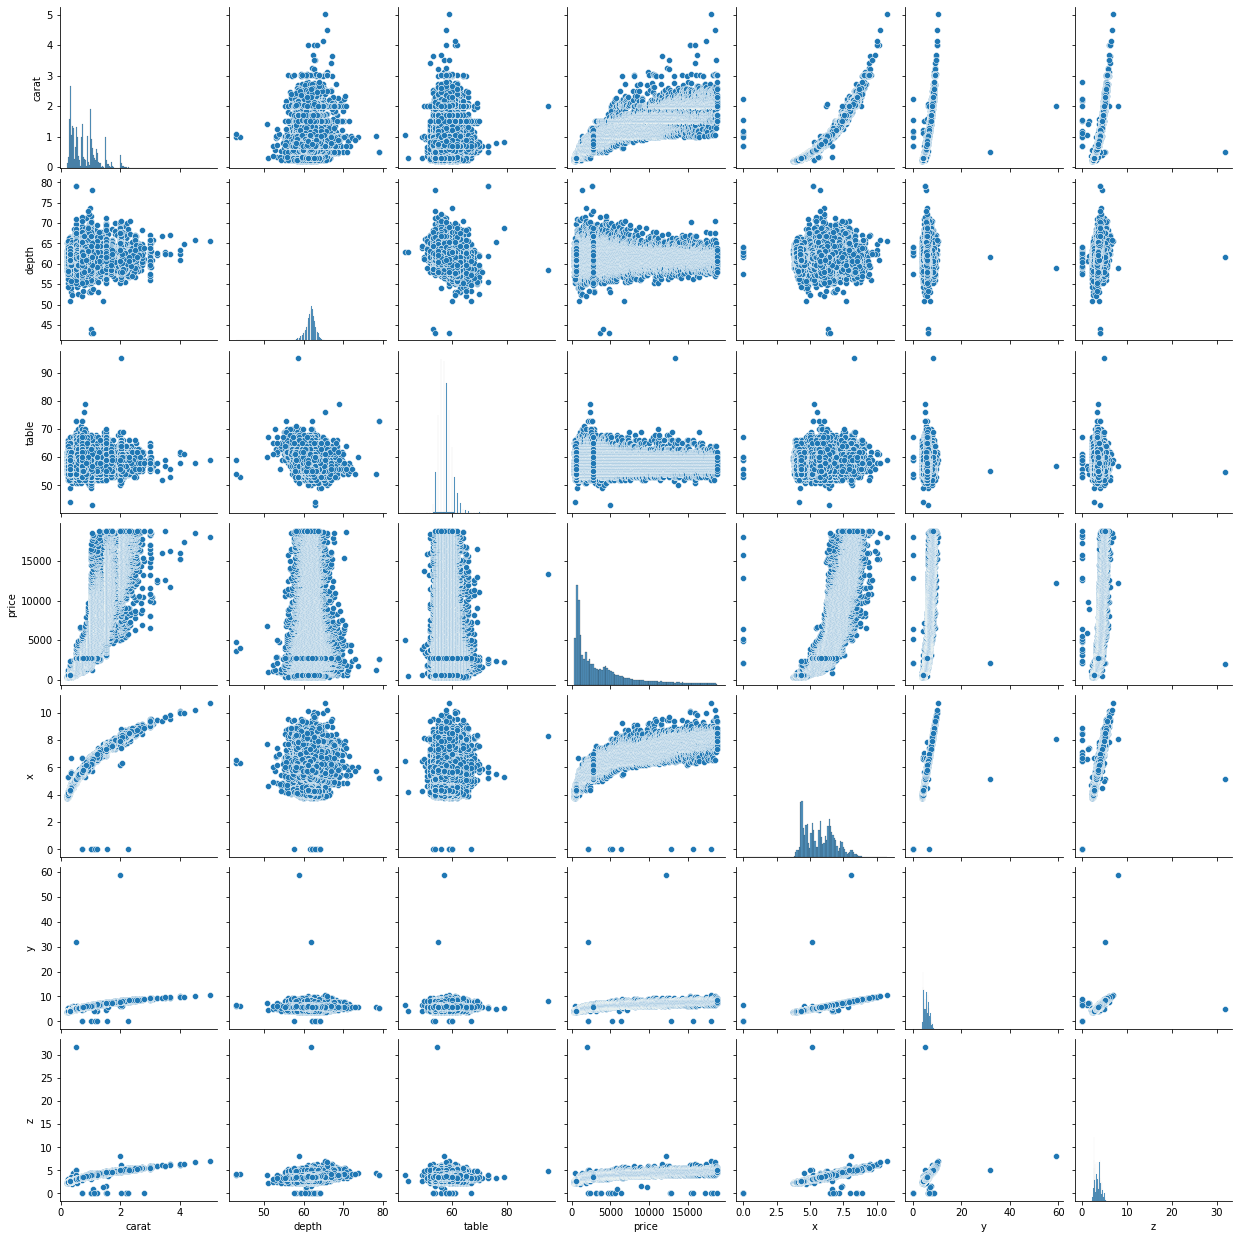

In [17]:
sns.pairplot(df)

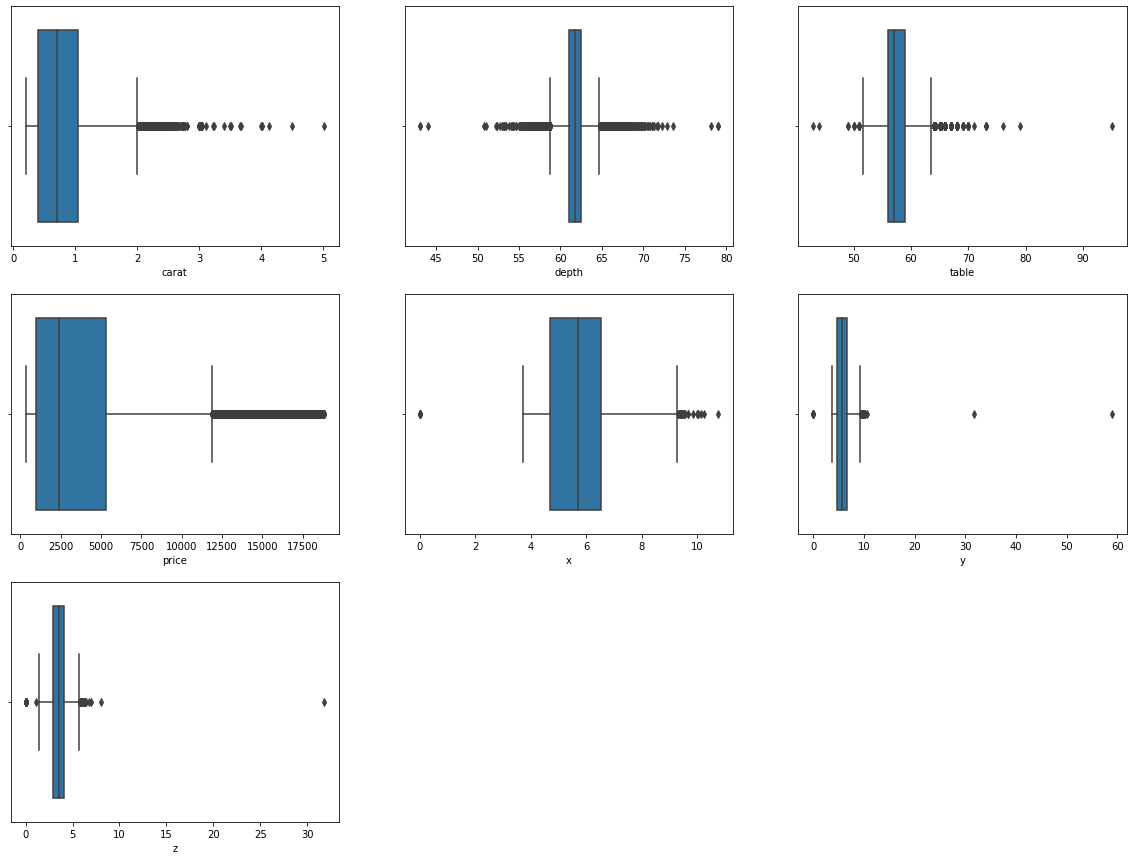

In [18]:
# plot the boxplot
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])

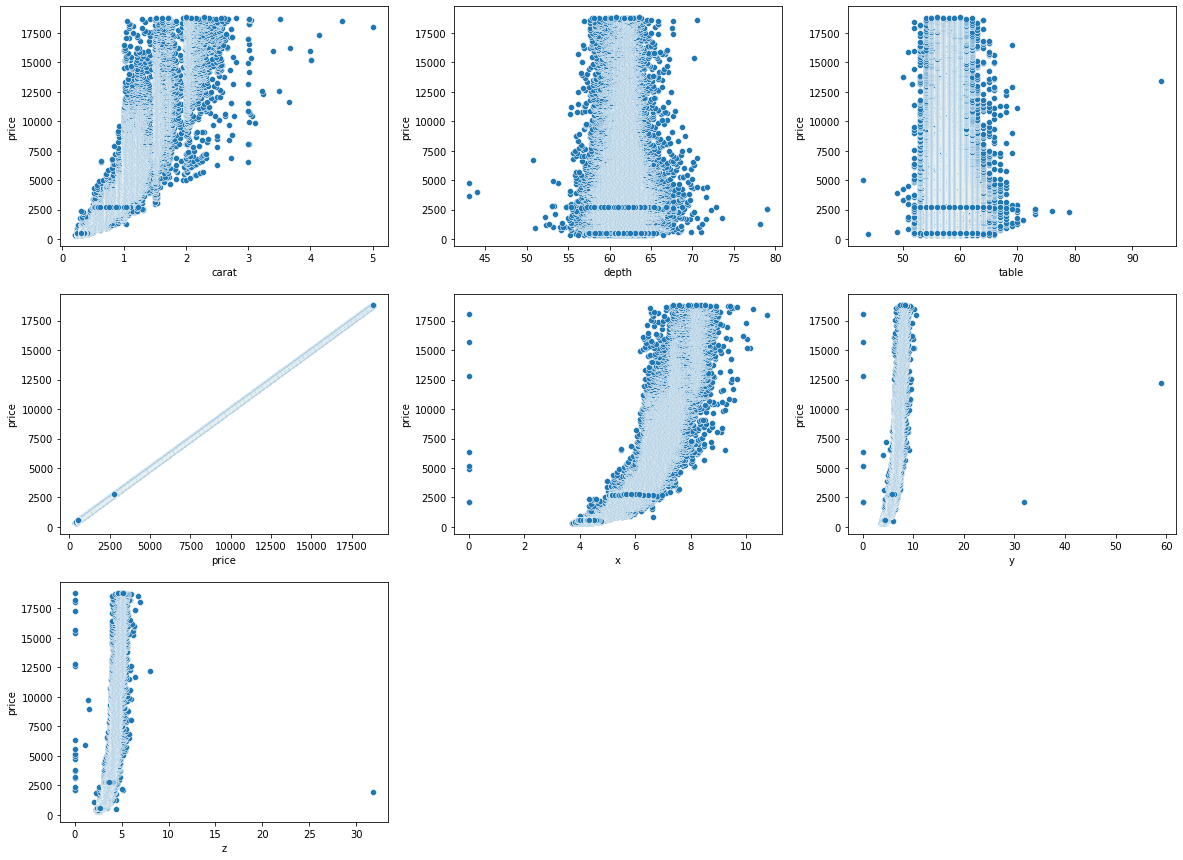

In [19]:
#scatter plot for all numeric columns
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(y = df['price'], x = df[col])

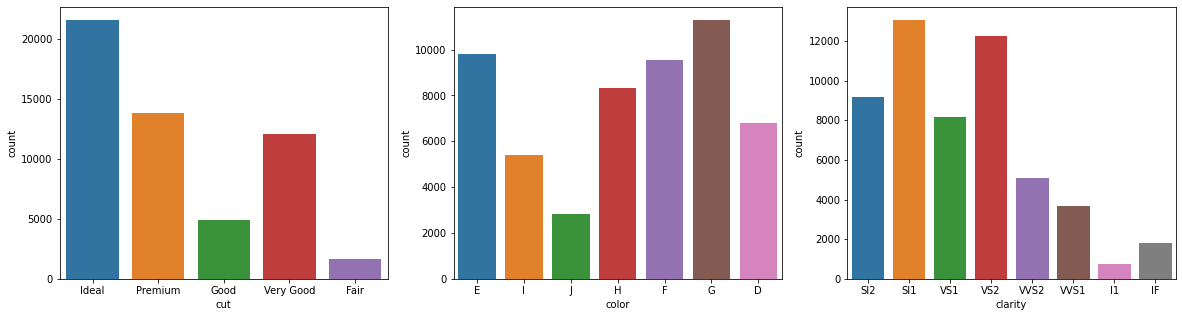

In [20]:
#count plot for all numeric columns
plt.figure(figsize = (20, 5))

for i , col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.countplot(df[col])

<AxesSubplot:>

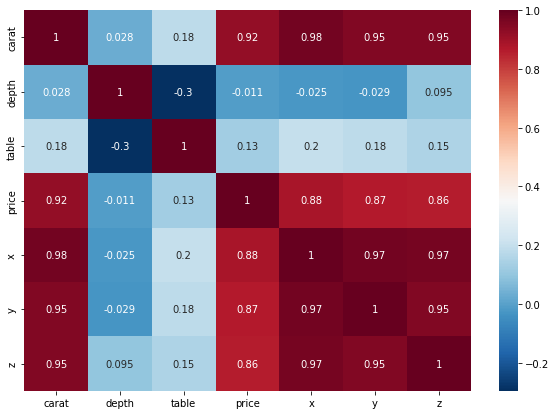

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), data = df, annot = True, cmap = 'RdBu_r')

In [22]:
X = df.drop('price', axis = 1)
y = df['price']

In [23]:
X,y

(       carat        cut color clarity  depth  table     x     y     z
 0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
 1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
 2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
 3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
 4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
 ...      ...        ...   ...     ...    ...    ...   ...   ...   ...
 53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
 53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
 53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
 53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
 53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64
 
 [53940 rows x 9 columns],
 0         326
 1         326
 2         327
 3         334
 4         335
          ... 
 53935    2757
 53936    2757

In [24]:
# split the data into train and test and make the data transformation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 9), (16182, 9), (37758,), (16182,))

In [26]:
# making the caterogical and numerical column seperately
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
19497,1.21,61.3,57.0,6.92,6.87,4.23
31229,0.31,62.0,56.0,4.38,4.36,2.71
22311,1.21,62.4,57.0,6.75,6.83,4.24
278,0.81,62.6,55.0,5.92,5.96,3.72
6646,0.79,61.7,56.0,5.94,5.95,3.67


In [27]:
X_train_cat.head()

,cut,color,clarity
19497,Ideal,H,VVS2
31229,Ideal,E,VS2
22311,Ideal,E,VS1
278,Ideal,F,SI2
6646,Ideal,I,VVS2


In [28]:
# as for categorical columns the data is comparitive so the columns are ordinal,  so we can use label encoding
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
19497
31229
22311
278
6646


In [29]:
X_train_cat.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [30]:
cut_le = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_le[x])

X_train_cat_le.head()

,cut
19497,4
31229,4
22311,4
278,4
6646,4


In [31]:
X_train_cat.color.unique()

array(['H', 'E', 'F', 'I', 'G', 'D', 'J'], dtype=object)

In [32]:
color_le = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_le[x])

X_train_cat_le.head()

,cut,color
19497,4,3
31229,4,6
22311,4,6
278,4,5
6646,4,2


In [33]:
X_train_cat.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [34]:
clarity_le = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_le[x])

X_train_cat_le.head()

,cut,color,clarity
19497,4,3,6
31229,4,6,4
22311,4,6,5
278,4,5,2
6646,4,2,6


In [35]:
X_train_cat_le.shape

(37758, 3)

In [36]:
# numerical column trasformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110


In [37]:
X_train_num_rescaled.shape

(37758, 6)

In [38]:
# concatinate the dataframes
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
# X_train_transformed = X_train_transformed.reset_index(drop = True)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,4,3,6
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,4,6,4
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,4,6,5
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,4,5,2
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,4,2,6


In [39]:
X_train_transformed.shape

(37758, 9)

In [40]:
# preparing the test data in same way:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [41]:
# num columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns,
                                      index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
1388,-1.177087,0.248547,-0.656213,-1.573073,-1.516519,-1.505623
50052,-0.462124,-1.221412,-0.207099,-0.263201,-0.278064,-0.395190
41645,-0.840634,0.248547,-1.105327,-0.869128,-0.871127,-0.830930
42377,-0.777549,-0.661428,-0.207099,-0.726557,-0.740304,-0.788761
17244,1.577621,0.388543,-1.105327,1.518937,1.422631,1.502385


In [42]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
1388
50052
41645
42377
17244


In [43]:
# categorical
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_le[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_le[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_le[x])
X_test_cat_le.head()

,cut,color,clarity
1388,4,4,7
50052,3,5,6
41645,4,6,6
42377,5,6,6
17244,4,6,2


In [44]:
# concatenate
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
# X_test_transformed = X_test_transformed.reset_index(drop = True)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
1388,-1.177087,0.248547,-0.656213,-1.573073,-1.516519,-1.505623,4,4,7
50052,-0.462124,-1.221412,-0.207099,-0.263201,-0.278064,-0.395190,3,5,6
41645,-0.840634,0.248547,-1.105327,-0.869128,-0.871127,-0.830930,4,6,6
42377,-0.777549,-0.661428,-0.207099,-0.726557,-0.740304,-0.788761,5,6,6
17244,1.577621,0.388543,-1.105327,1.518937,1.422631,1.502385,4,6,2


In [45]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [46]:
# instanciating the model
linear_model = LinearRegression()
knn_model = KNeighborsRegressor()
rfr_model = RandomForestRegressor()

In [47]:
# fitting the linear regressor
linear_model.fit(X_train_transformed, y_train)

LinearRegression()

In [48]:
pred = linear_model.predict(X_test_transformed)

In [49]:
pred[:5]

array([  876.51804092,  3120.52163074,  2119.97031834,  2429.54843144,
       10129.85024033])

In [50]:
mse_lr = mean_squared_error(y_test, pred)

In [51]:
df_comp_lr = pd.DataFrame(list(zip(y_test, pred )), columns = ['y_test', 'pred'])
df_comp_lr

,y_test,pred
0,559,876.518041
1,2201,3120.521631
2,1238,2119.970318
3,1304,2429.548431
4,6901,10129.850240
...,...,...
16177,705,671.207735
16178,5278,5156.348102
16179,13157,10076.581616
16180,2960,3994.928622


In [52]:
# Knn
knn_model.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [53]:
pred_knn = knn_model.predict(X_test_transformed)

In [54]:
mse_knn = mean_squared_error(y_test, pred_knn)

In [55]:
df_comp_knn = pd.DataFrame(list(zip(y_test, pred_knn )), columns = ['y_test', 'pred_knn'])
df_comp_knn

,y_test,pred_knn
0,559,604.6
1,2201,2397.6
2,1238,1048.8
3,1304,1201.0
4,6901,9642.2
...,...,...
16177,705,862.0
16178,5278,4912.4
16179,13157,12313.2
16180,2960,2925.4


In [56]:
rfr_model.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [57]:
pred_rfr = rfr_model.predict(X_test_transformed)

In [58]:
mse_rfr = mean_squared_error(y_test, pred_rfr)

In [59]:
df_comp_rfr = pd.DataFrame(list(zip(y_test, pred_rfr )), columns = ['y_test', 'pred_rfr'])
df_comp_rfr

,y_test,pred_rfr
0,559,560.23
1,2201,2426.46
2,1238,1206.67
3,1304,1217.52
4,6901,9287.79
...,...,...
16177,705,752.63
16178,5278,4795.23
16179,13157,12892.76
16180,2960,3219.74


### Serialization

In [61]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(linear_model, open('models/linear_regression_model.pkl', 'wb'))
dump(knn_model, open('models/knn_model.pkl', 'wb'))
dump(rfr_model, open('models/random_forest_regression_model.pkl', 'wb'))

### Deserialization

In [62]:
# Loading pretrained classifiers from pickle file
from pickle import load
scaler = load(open('models/standard_scaler.pkl', 'rb'))
rfr_model_load = load(open('models/random_forest_regression_model.pkl', 'rb'))

In [63]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [64]:
# Get the imput from the user
print("enter the details about the diamond: ")
carat = float(input('Enter the weight of diamond/ carats'))
print("enter the cut details based on the data given below")
print("'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5")
cut = int(input('Enter the cut details: '))
print("enter the color details based on the data given below")
print("'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7")
color = int(input("Enter the color details: "))
print("enter the clarity details based on the data given below")
print("'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8")
clarity = int(input("Enter the clarity details: "))
depth = float(input("Enter the depth details: "))
table = float(input("Enter the table top width: "))
x = float(input("Enter the length in mm: "))
y = float(input("Enter the width in mm: "))
z = float(input("Enter the depth in mm : "))

enter the details about the diamond: 
Enter the weight of diamond/ carats0.23
enter the cut details based on the data given below
'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5
Enter the cut details: 4
enter the color details based on the data given below
'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
Enter the color details: 6
enter the clarity details based on the data given below
'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8
Enter the clarity details: 2
Enter the depth details: 61
Enter the table top width: 55.0
Enter the length in mm: 3.9
Enter the width in mm: 3.98
Enter the depth in mm : 2.43


In [65]:
X_train_transformed.head(1)

,carat,depth,table,x,y,z,cut,color,clarity
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,4,3,6


In [66]:
diamond_details = np.array([carat, depth, table, x, y, z])
le_columns = np.array([cut, color, clarity])

In [67]:
diamond_details = diamond_details.reshape(1, -1)
le_columns = le_columns.reshape(1, -1)

In [68]:
diamond_details_transformed = scaler.transform(diamond_details)
diamond_details_transformed

array([[-1.19811507, -0.52143151, -1.10532676, -1.63544763, -1.53396174,
        -1.56184769]])

In [69]:
sample_point = np.concatenate((diamond_details_transformed, le_columns), axis =1)
sample_point

array([[-1.19811507, -0.52143151, -1.10532676, -1.63544763, -1.53396174,
        -1.56184769,  4.        ,  6.        ,  2.        ]])

In [70]:
rfr_model_load.predict(sample_point)

array([375.63])